# Pushkal Ojha
# 220968422
# Batch : A2 
# Section : A

In [15]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

## Importing dataset

In [16]:
df = pd.read_csv("mtcars.csv")

In [17]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


## Choosing columns for Linear Regression and pre_processing

In [18]:
df = df[['mpg','cyl']]

In [19]:
Q1 = np.percentile(df,25)
Q3 = np.percentile(df,75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [20]:
outliers = (df<lower)|(df>upper)

In [21]:
outliers

,mpg,cyl
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


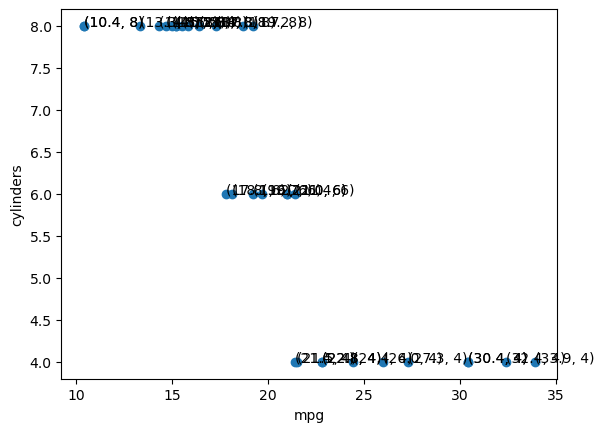

In [22]:
plt.scatter(df.mpg,df.cyl)
plt.xlabel("mpg")
plt.ylabel("cylinders")
for i in range(len(df)):
    plt.annotate(f"({df.mpg[i]}, {df.cyl[i]})", xy=(df.mpg[i], df.cyl[i]), xycoords='data', textcoords='data')

## Making Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df['cyl']
y = df['mpg']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
mtcars_lr = LinearRegression()

In [28]:
X_train_reshaped = np.array(X_train).reshape(-1,1)

In [29]:
mtcars_lr.fit(X_train_reshaped,y_train)

LinearRegression()

In [30]:
X_test_reshaped = np.array(X_test).reshape(-1,1)

In [31]:
y_pred = mtcars_lr.predict(X_test_reshaped)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
x=df[['mpg']]
y=df[['cyl']]

a1=mtcars_lr.coef_
a0=mtcars_lr.intercept_
y1=a0+a1*x
print("a0=",a0,", a1=",a1)

a0= 37.49858870967742 , a1= [-2.81340726]


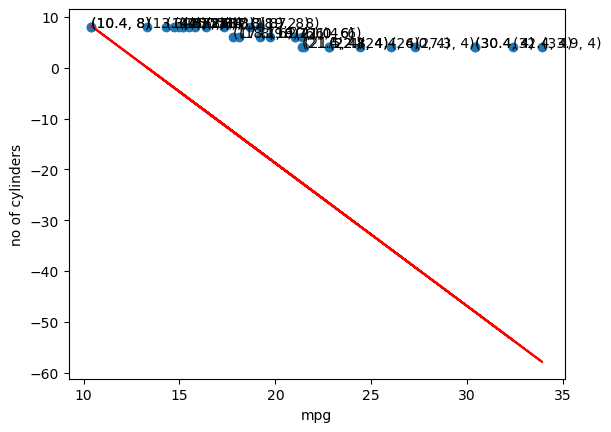

In [39]:
plt.scatter(x,y)
plt.plot(x,y1,'r')
plt.xlabel("mpg")
plt.ylabel("no of cylinders")
for i in range(len(df)):
    plt.annotate(f"({df.mpg[i]}, {df.cyl[i]})", xy=(df.mpg[i], df.cyl[i]), xycoords='data', textcoords='data')

## Mean Squared Error

In [34]:
mse = mean_squared_error(y_test,y_pred)

In [35]:
mse

13.057097825228551

In [36]:
y_pred

array([20.61814516, 14.99133065, 14.99133065, 26.24495968, 26.24495968,
       20.61814516, 14.99133065])

In [37]:
y_test

29    19.7
15    10.4
24    19.2
17    32.4
8     22.8
9     19.2
30    15.0
Name: mpg, dtype: float64